# Домашнее задание № 8

# Ансамблирование

1. Получение данных

In [26]:
# подключаемся в Heart Failure Prediction Dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


In [42]:
import pandas as pd

# считываем данные
path = '/root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1/heart.csv'
df = pd.read_csv(path)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Атрибутивная информация
1. Age: возраст пациента [годы]
2. Sex: пол пациента [M: Мужчина, F: женщина]
3. ChestPainType: тип боли в груди [TA: типичная стенокардия, ATA: атипичная стенокардия, NAP: нестенокардитическая боль, ASY: бессимптомная]
4. RestingBP: кровяное давление в состоянии покоя [мм рт. ст.]
5. Cholesterol: сывороточный холестерин [мм / дл]
6. FastingBS: уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: в противном случае]
7. RestingECG: результаты электрокардиограммы в состоянии покоя [норма: норма, ST: наличие отклонений ST-T (инверсии зубца T и/или подъем или депрессия сегмента ST более 0,05 мВ), ГЛЖ: вероятная или явная гипертрофия левого желудочка по критериям Эстеса]
8. MaxHR: максимальная частота сердечных сокращений [числовое значение от 60 до 202]
9. ExerciseAngina: стенокардия, вызванная физической нагрузкой [Y: да, N: нет]
10. Oldpeak: oldpeak = ST [Числовое значение, измеряемое при депрессии]
11. ST_Slope: наклон пикового сегмента ST [Вверх: восходящий, Плоский: горизонтальный, Вниз: нисходящий]

Целевая переменная
* HeartDisease: выходной класс [1: заболевание сердца, 0: нормальное состояние]

Посмотрим, что тут есть

In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
# проверим на пропуски
df[df.isna().any(axis=1)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


2. Подготовим датасет к обучению

Рассмотрим наши категориальные переменные более подробно

In [28]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [25]:
# ChestPainType
df['ChestPainType'].value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [15]:
# RestingECG
df['RestingECG'].value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [17]:
# ExerciseAngina
df['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [18]:
# ST_Slope
df['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


Преобразуем их в числоые признаки

In [43]:
df = pd.get_dummies(data=df, columns=['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'],
                    prefix=['C', 'R', 'E', 'S'])
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,C_ASY,C_ATA,C_NAP,C_TA,R_LVH,R_Normal,R_ST,E_N,E_Y,S_Down,S_Flat,S_Up
0,40,M,140,289,0,172,0.0,0,False,True,False,False,False,True,False,True,False,False,False,True
1,49,F,160,180,0,156,1.0,1,False,False,True,False,False,True,False,True,False,False,True,False
2,37,M,130,283,0,98,0.0,0,False,True,False,False,False,False,True,True,False,False,False,True
3,48,F,138,214,0,108,1.5,1,True,False,False,False,False,True,False,False,True,False,True,False
4,54,M,150,195,0,122,0.0,0,False,False,True,False,False,True,False,True,False,False,False,True


In [44]:
# преобразуем Sex
gender_map = {'F': 0, 'M': 1}
df['Sex'] = df['Sex'].map(gender_map)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,C_ASY,C_ATA,C_NAP,C_TA,R_LVH,R_Normal,R_ST,E_N,E_Y,S_Down,S_Flat,S_Up
0,40,1,140,289,0,172,0.0,0,False,True,False,False,False,True,False,True,False,False,False,True
1,49,0,160,180,0,156,1.0,1,False,False,True,False,False,True,False,True,False,False,True,False
2,37,1,130,283,0,98,0.0,0,False,True,False,False,False,False,True,True,False,False,False,True
3,48,0,138,214,0,108,1.5,1,True,False,False,False,False,True,False,False,True,False,True,False
4,54,1,150,195,0,122,0.0,0,False,False,True,False,False,True,False,True,False,False,False,True


Вируализация

In [51]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

<Axes: >

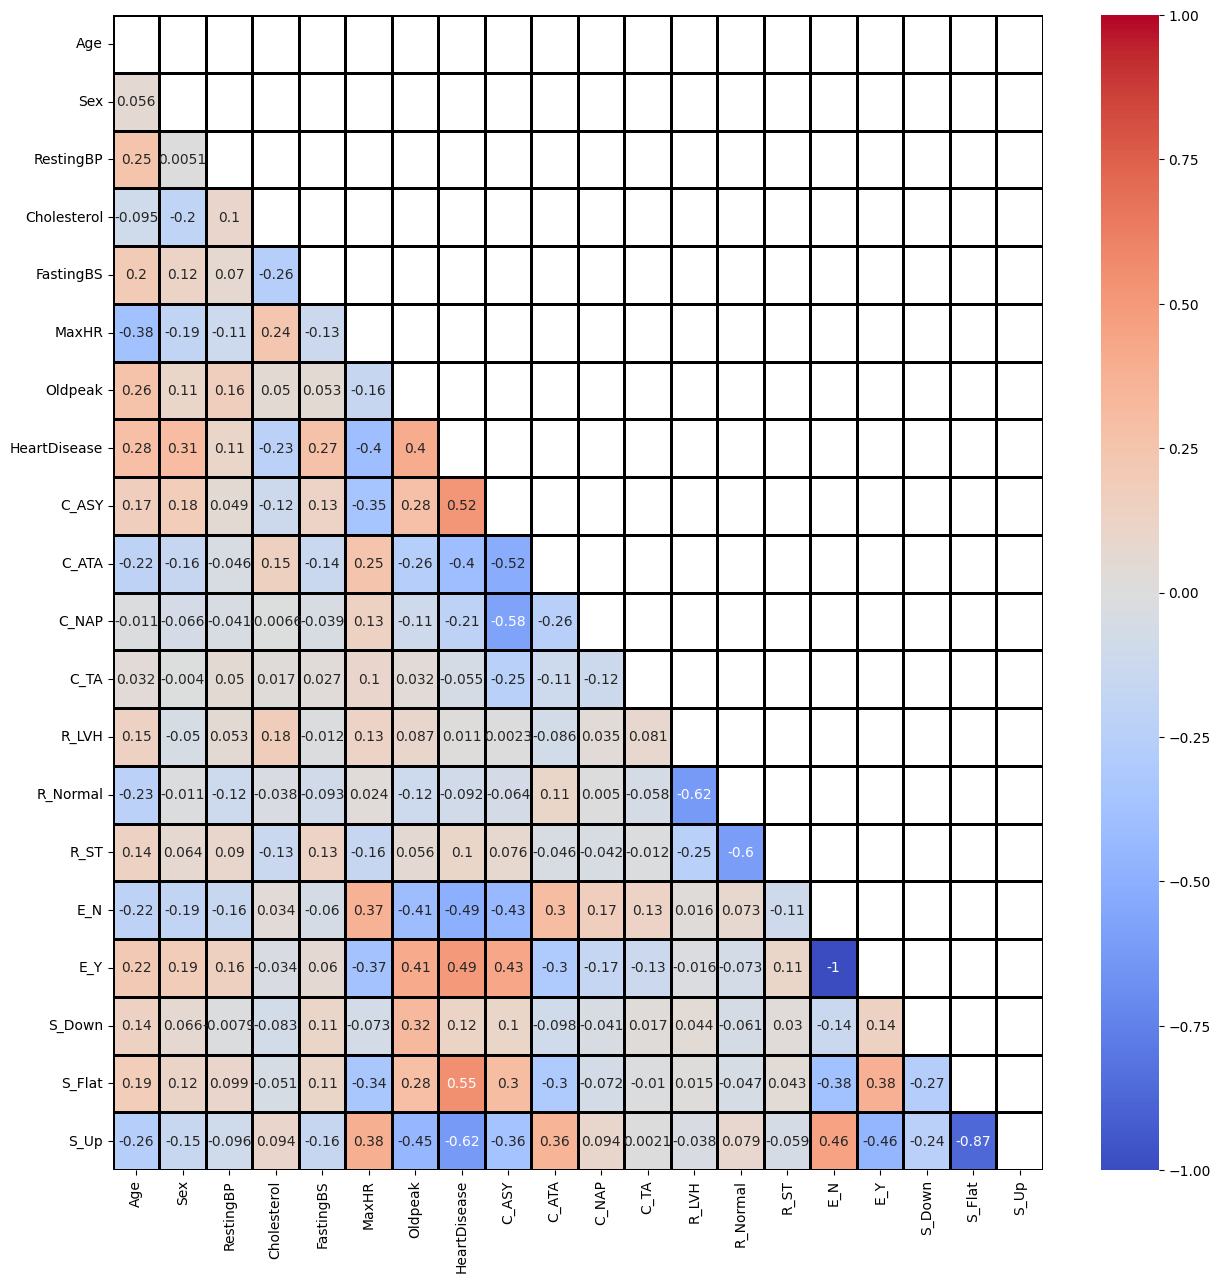

In [71]:
matrix = np.triu(df.corr())     # для построение карты треугольной форма
mask = np.tril(df.corr())       # другой вариант

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),          # построение корреляции
            annot=True,         # нахождение коэффициенто корреляции
            fmt='.2g',          # не более 2-х знаков после запятой
            vmin=-1,            # шкала (-1, 1) с центром в 0
            vmax=1,
            center=0,
            cmap='coolwarm',    # настройка цвета
            linewidths=1,       # толщина линий
            linecolor='black',  # цвет линий
            # cbar_kws={'orientation': 'horizontal'}   # для горизонтального расположения
            # cbar=False        # можно убрать шкалу
            # square=True       # сделать ячейки квадратными
            mask=matrix         # треуголиник основанием вниз
            # mask=mask         # треугольник основание вверх
            )